In [1]:
import tweepy

consumer_key = "Kmnf8MLIZHwiXiOpGE8vitBbt"
consumer_secret = "igNLdmsqCxljyOIqAc2UetPqfZWPyZXzmX8I91w4Kup8uLKlZH"
access_token = "1315527401091203072-RzVmcwVWXy3Zi6yECnlRVvoojXWIxR"
access_token_secret = "NqHPT7RwsKoL8iyCoGfKqXPKMJiJDbV6Gqis3i0mFU0ed"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [2]:
import time
import pandas as pd
import datetime

def scrapetweets(text_query, dateto):
    try:

        tweets = tweepy.Cursor(api.search_full_archive,environment_name='dltweetscrape',query=text_query,toDate=dateto,maxResults=500).items(500)
 
        tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
        tweets_df = pd.DataFrame(tweets_list)
    
        return tweets_df
 
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

In [3]:
a_text_query = '#VoteHilary OR #VoteBlue OR #ImWithHer OR #nevertrump OR #LoveTrumpsHate'
b_text_query = '#VoteTrump OR #VoteRed OR #Trump2016 OR #MakeAmericaGreatAgain OR #BuildTheWall'

In [4]:
# T-14 Days
todate = '201610250000'

a_tweets_df = scrapetweets(a_text_query, todate)
for a in range(0,3):
    toDT = str(int(todate) + 200 + a*200)
    a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, toDT))

In [7]:
# T-30 Days
todate = '201610080000'

a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, todate))
for a in range(0,3):
    toDT = str(int(todate) + 200 + a*200)
    a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, toDT))

In [8]:
# T-90 Days
todate = '201608080000'

a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, todate))
for a in range(0,3):
    toDT = str(int(todate) + 200 + a*200)
    a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, toDT))

In [9]:
# T-14 Days
todate = '201610250000'

b_tweets_df = scrapetweets(b_text_query, todate)
for b in range(0,3):
    toDT = str(int(todate) + 200 + b*200)
    b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, toDT))

In [10]:
# T-30 Days
todate = '201610080000'

b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, todate))
for b in range(0,3):
    toDT = str(int(todate) + 200 + b*200)
    b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, toDT))

In [11]:
# T-90 Days
todate = '201608080000'

b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, todate))
for b in range(0,3):
    toDT = str(int(todate) + 200 + b*200)
    b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, toDT))

In [12]:
a_tweets_df.columns = ['Created At','Tweet Id','Tweet']
b_tweets_df.columns = ['Created At','Tweet Id','Tweet']

In [13]:
a_tweets_df.describe()

,Tweet Id
count,6.000000e+03
mean,7.792720e+17
std,1.213818e+16
min,7.624334e+17
25%,7.625127e+17
50%,7.845886e+17
75%,7.907114e+17
max,7.907950e+17


In [14]:
b_tweets_df.describe()

,Tweet Id
count,6.000000e+03
mean,7.792700e+17
std,1.213878e+16
min,7.624259e+17
25%,7.625082e+17
50%,7.845857e+17
75%,7.907112e+17
max,7.907950e+17


In [15]:
a_tweets_df['Label'] = 'Clinton'
b_tweets_df['Label'] = 'Trump'

tweets_df = pd.concat([a_tweets_df,b_tweets_df])

tweets_df['Length'] = tweets_df['Tweet'].apply(len)

tweets_df = tweets_df.sample(frac=1)

tweets_df.head()

,Created At,Tweet Id,Tweet,Label,Length
303,2016-10-08 03:57:12,784603525066199040,When can we expect your endorsement retraction...,Clinton,84
338,2016-10-07 23:56:56,784543059820351488,"RT @TheWomensWatch: A Letter to my Father, The...",Clinton,140
63,2016-10-25 05:56:39,790794179408384000,"She may eat pizza with a fork &amp; knife, but...",Clinton,118
395,2016-10-08 01:41:29,784569371981209602,RT @Miami4Trump: Only An Evil Woman Would Laug...,Trump,140
302,2016-08-08 03:43:12,762494341159854085,RT @taradublinrocks: They're running actual fo...,Clinton,140


In [16]:
tweets_df.to_csv("tweetsfortrain.csv", index = False, header = True)

In [1]:
# Only run this line if reading from existing .csv file
import pandas as pd
tweets_df = pd.read_csv("tweetsfortrain_2016.csv")

In [2]:
tweets_df.head()

,Created At,Tweet Id,Tweet,Label,Length
0,2016/10/8 03:57,7.846040e+17,When can we expect your endorsement retraction...,Clinton,84
1,2016/10/7 23:56,7.845430e+17,"RT @TheWomensWatch: A Letter to my Father, The...",Clinton,140
2,2016/10/25 05:56,7.907940e+17,"She may eat pizza with a fork &amp; knife, but...",Clinton,118
3,2016/10/8 01:41,7.845690e+17,RT @Miami4Trump: Only An Evil Woman Would Laug...,Trump,140
4,2016/8/8 03:43,7.624940e+17,RT @taradublinrocks: They're running actual fo...,Clinton,140


In [3]:
tweets_df.drop_duplicates(subset='Tweet',inplace=True)

count    6408.000000
mean      119.139201
std        28.371864
min        10.000000
25%       104.000000
50%       134.000000
75%       140.000000
max       152.000000
Name: Length, dtype: float64

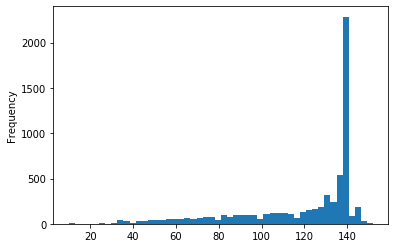

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

tweets_df['Length'].plot(bins=50, kind='hist') 
tweets_df['Length'].describe()

In [5]:
import string
import re
from nltk.corpus import stopwords
from nltk.util import ngrams

def text_process(mess):

#    mess = re.sub('@[^\s]+', 'AT_USER', mess)
    
    mess = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', mess)
    
#    mess = re.sub('#[^\s]+', 'HASHTAG', mess)
    
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    words = [word.lower() for word in nopunc.split() if word.lower() not in set(stopwords.words('english') + ['url','rt','hashtag'])]

    return words

#    return ngrams(words,2)

tweets_df['Tweet'].head(5).apply(text_process)

0        [expect, endorsement, retraction, nevertrump]
1    [thewomenswatch, letter, father, man, chose, d...
2    [may, eat, pizza, fork, amp, knife, freakin, p...
3    [miami4trump, evil, woman, would, laugh, getti...
4    [taradublinrocks, theyre, running, actual, foo...
Name: Tweet, dtype: object

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(tweets_df['Tweet'])
print(len(bow_transformer.vocabulary_))

13731


In [7]:
tweets_bow = bow_transformer.transform(tweets_df['Tweet'])
print('Shape of Sparse Matrix: ', tweets_bow.shape)
print('Amount of Non-Zero occurences: ', tweets_bow.nnz)

Shape of Sparse Matrix:  (6408, 13731)
Amount of Non-Zero occurences:  62041


In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(tweets_bow)

tweets_tfidf = tfidf_transformer.transform(tweets_bow)
print(tweets_tfidf.shape)

(6408, 13731)


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

tweet_train, tweet_test, label_train, label_test = train_test_split(tweets_df['Tweet'], tweets_df['Label'], test_size=0.2)

print(len(tweet_train), len(tweet_test), len(tweet_train) + len(tweet_test))

5126 1282 6408


In [10]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [12]:
pipeline.fit(tweet_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7febedaba9d8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [13]:
predictions = pipeline.predict(tweet_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

     Clinton       0.98      0.89      0.94       860
       Trump       0.82      0.97      0.89       422

    accuracy                           0.92      1282
   macro avg       0.90      0.93      0.91      1282
weighted avg       0.93      0.92      0.92      1282



In [15]:
from sklearn.externals import joblib

joblib.dump(pipeline, 'election_nlp_v1.x')

/Users/lauhiuyan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['election_nlp_v1.x']

In [54]:
c_text_query = '#2016election OR #uselection'

# T-90 Days
todate = '201608080000'

c_tweets_df = scrapetweets(c_text_query, todate)
for c in range(0,3):
    toDT = str(int(todate) + 200 + c*200)
    c_tweets_df = c_tweets_df.append(scrapetweets(c_text_query, toDT))

In [55]:
c_tweets_df.columns = ['Created At','Tweet Id','Tweet']

In [56]:
c_tweets_df.describe()

,Tweet Id
count,2.000000e+03
mean,7.624024e+17
std,3.756055e+13
min,7.623535e+17
25%,7.623680e+17
50%,7.623931e+17
75%,7.624286e+17
max,7.625268e+17


In [57]:
c_tweets_df['Length'] = c_tweets_df['Tweet'].apply(len)
c_tweets_df.head()

,Created At,Tweet Id,Tweet,Length
0,2016-08-07 23:59:29,762438043676450817,RT @GovGaryJohnson: .@GovBillWeld &amp; I are ...,138
1,2016-08-07 23:55:22,762437006077022209,RT @JohnRMoffitt: #2016Election Republicans ha...,140
2,2016-08-07 23:54:55,762436893820596224,Check out this 2016 election forecast via @270...,89
3,2016-08-07 23:53:46,762436604082331648,RT @GovGaryJohnson: .@GovBillWeld &amp; I are ...,138
4,2016-08-07 23:52:23,762436258018668544,RT @JohnRMoffitt: #PsychoTrump #2016Election W...,140


In [33]:
# Only run this line if reading from existing .csv file
c_tweets_df = pd.read_csv("predictionresult_2016_t90.csv")

In [34]:
c_tweets_df.drop_duplicates(subset='Tweet',inplace=True)

In [35]:
predictions_c = pipeline.predict(c_tweets_df['Tweet'])

In [36]:
predictions_c

array(['Clinton', 'Clinton', 'Clinton', 'Clinton', 'Trump', 'Trump',
       'Clinton', 'Trump', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Trump', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton',
       'Clinton', 'Clinton', 'Clinton', 'Clinton', 'Clinton

In [37]:
c_tweets_df['Prediction'] = predictions_c

In [38]:
import numpy as np
result_table = pd.DataFrame(np.array([sum(predictions_c == 'Trump'),sum(predictions_c == 'Clinton')]) , columns=['Counts'])

In [39]:
result_table.rename(index={0: "Trump", 1: "Clinton"}, inplace=True)

In [40]:
result_table

,Counts
Trump,21
Clinton,176


In [41]:
c_tweets_df.to_csv("predictionresult_2016_t90_words.csv", index = False, header = True)